# TensorFlow

[TensorFlow](https://www.tensorflow.org/) is an open-source machine learning library developed by [Google](https://www.google.org/). It provides a flexible framework for building and training various machine learning models, particularly deep neural networks. TensorFlow allows you to define and execute computational graphs efficiently across different hardware platforms, such as CPUs, GPUs, or TPUs.

TensorFlow operates based on the concept of tensors, which are multi-dimensional arrays. It leverages a static computation graph, where you define the operations and connections between nodes in the graph, and then execute the graph within a TensorFlow session.

In this tutorial, we will discover a step-by-step guide to developing deep learning models in TensorFlow using the `tf.keras` API.
***
After completing this tutorial, you will know:

- The difference between `keras` and `tf.keras` and how to install and confirm `TensorFlow` is working.
- The 5-step life-cycle of `tf.keras` models and how to use the `sequential` and `functional APIs`.
- How to develop `MLP`, `CNN`, and `RNN` models with `tf.keras` for regression, classification, and time series forecasting.
- How to use the advanced features of the `tf.keras API` to inspect and diagnose your model.
- How to improve the performance of your `tf.keras` model by reducing overfitting and accelerating training.

## Keras

Keras is a popular open-source deep learning library written in Python. It gained popularity due to its clean and simple API, which allowed developers to define, train, and evaluate deep learning models with just a few lines of code.

One of the key reasons for Keras' success was its ability to seamlessly integrate with various backend libraries for performing computations, such as TensorFlow, Theano, and CNTK. This integration allowed users to leverage the power of these libraries, including GPU acceleration, while benefiting from Keras' user-friendly interface.

In 2019, Google introduced TensorFlow 2, which incorporated the Keras API directly into the TensorFlow library. This integration, known as `tf.keras`, became the default and recommended interface for deep learning development in the TensorFlow ecosystem. It provided a standardized way to use Keras functionality within TensorFlow, simplifying the development process and offering the advantages of both TensorFlow and Keras.

It's important to note that there are two distinct versions of Keras: the standalone open-source project and `tf.keras` integrated into TensorFlow 2. The standalone version supports multiple backends, including TensorFlow, Theano, and CNTK, while `tf.keras` refers specifically to the Keras API integrated within TensorFlow 2.

To start, you need to install TensorFlow using pip:

```python
pip install tensorflow
```

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

This confirms that TensorFlow is installed correctly as the version of tensorflow being installed is shown.

## Deep Learning Model Life-Cycle

In deep learning, a model goes through a life-cycle consisting of five essential steps. These steps are crucial for both modeling a dataset and using the `tf.keras` API effectively. Let's explore each step in detail:

### 1. Define the Model

The first step is to choose the appropriate type of model for your task and then design its architecture or network topology. In the `tf.keras` API, you define the model by specifying its layers. Each layer is configured with the desired number of nodes and activation function. The layers are then connected to form a cohesive model. There are two options for defining models:
- Sequential API
- Functional API.

In [2]:
model = tf.keras.Sequential()

### 2. Compile the Model

After defining the model, you need to compile it. This involves selecting a loss function to optimize, such as mean squared error or cross-entropy. You also choose an optimization algorithm, typically stochastic gradient descent (SGD) or a modern variation like Adam. Additionally, you can specify performance metrics to track during the model training process. Compiling the model in the `tf.keras` API involves calling a function that prepares the necessary data structures for efficient model usage.

Here are a list of supported [Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) and [Losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

In [3]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

### 3. Fit the Model

During the training phase, fitting the model requires making some important configuration choices. You need to specify the number of epochs, which determines how many times the model will iterate over the training dataset. The batch size is another configuration option that determines the number of samples processed before updating the model's parameters.

The training process applies an optimization algorithm, such as stochastic gradient descent (SGD), to minimize the chosen loss function. It updates the model's weights and biases using the backpropagation algorithm, which propagates the error through the layers of the network.

Fitting the model is often the most time-consuming step in the whole process. The duration can vary significantly depending on factors like the complexity of the model, the hardware being used, and the size of the training dataset. It can take seconds, hours, or even days.

In terms of the `tf.keras` API, fitting the model involves calling a function that performs the training process. This function will block, meaning it will not return until the training is complete. As the model trains, a progress bar shows the status of each epoch and the overall training progress. You can adjust the verbosity of the output by setting the `verbose` argument.

- `verbose=0:` Disables all output during training
- `verbose=1:` Enables a simplified progress bar that provides an overview of the training process
- `verbose=2:` Provides a summary of model performance after each epoch

In [4]:
# model.fit(X, y, epochs=100, batch_size=32, verbose=0)

### 4. Evaluate the Model

To evaluate a trained model, you need to set aside a separate dataset called a holdout dataset. This dataset should not be used during the training process to ensure an unbiased estimate of the model's performance when making predictions on new, unseen data.

The speed of model evaluation depends on the amount of data you use for evaluation. However, evaluating a model is generally faster than training because the model's parameters are not updated during evaluation.

In the tf.keras API, evaluating the model involves calling a specific function with the holdout dataset. This function calculates the loss and, optionally, other metrics that you can report. The loss provides a measure of how well the model is performing on the evaluation dataset, while additional metrics can give you more specific insights into the model's performance.

By evaluating the model on a holdout dataset, you can assess its generalization ability and gain confidence in its ability to make accurate predictions on new, unseen data.

In [5]:
# loss = model.evaluate(X, y, verbose=0)

### 5. Make a Prediction

Making predictions is the final step in the life-cycle of a deep learning model, and it is the main reason we build the model in the first place. This step involves using the trained model to make predictions on new, unseen data for which we do not have the target values.

From the perspective of the tf.keras API, making predictions is straightforward. You simply call a function to feed the new data into the model and obtain the desired output. The output can be a class label, a probability, or any numerical value, depending on the specific task you designed the model for.

In some cases, you may want to save the trained model for later use. This can be achieved by saving the model's architecture, weights, and optimizer state to disk. Later, you can load the saved model and make predictions using the loaded model without having to retrain it.

It's also worth mentioning that sometimes it can be beneficial to train the model on all the available data before using it for predictions. This approach, known as "fitting on full data," allows the model to learn from all the available information and potentially improve its performance.

In [6]:
# y_hat = model.predict(X)

## Sequential Model API (Simple)

The `Sequential` model API is the simplest and most recommended approach, especially for beginners in deep learning. It allows you to build models in a linear, sequential manner, from input to output.

In the `Sequential` model API, you create an instance of the `Sequential` class and add layers to the model one by one. Each layer represents a specific operation or transformation that the data undergoes as it flows through the network.

For example, let's consider a `Sequential` MLP model. MLP stands for Multi-Layer Perceptron, which is a type of neural network. In this example, we have eight input features, one hidden layer with 10 nodes, and an output layer with one node that predicts a numerical value.

To define this model using the Sequential API, you would:
- Create a `Sequential` model instance.
- Add the first layer, specifying the number of input features. In this case, it would be eight.
- Add the hidden layer with 10 nodes, specifying the activation function and other configuration if needed.
- Add the output layer with one node, again specifying the activation function if applicable.

Here's an example code snippet that demonstrates the definition of the Sequential MLP model:

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()  # Create a Sequential model
model.add(Dense(10, input_shape=(8,), activation='relu'))  # Add the input layer
model.add(Dense(10, activation='relu'))  # Add the hidden layer
model.add(Dense(1, activation='linear'))  # Add the output layer

# This can also be coded as:
# model = Sequential([
#     Dense(10, input_shape=(8,), activation='relu'),
#     Dense(10, activation='relu'),
#     Dense(1, activation='linear')
# ])

In this code, we import the necessary modules from `tensorflow.keras`. We create a `Sequential` model object and use the `add()` method to add layers to the model. We specify the number of nodes and the activation function for each layer.

For more on the Sequential API, see: [The Keras sequential API in TensorFlow](https://www.tensorflow.org/guide/keras/sequential_model)

## Functional Model API (Advanced)


The `Functional` API in `tf.keras` provides a more flexible approach for defining deep learning models compared to the `Sequential` API. While it is slightly more complex, it offers greater flexibility in terms of model architecture.

In the functional API, you explicitly connect the output of one layer to the input of another layer, allowing you to create more complex network architectures, such as multi-input or multi-output models. Each connection between layers is specified explicitly.

To use the functional API, you start by defining an input layer using the `Input` class. You specify the shape of an input sample, indicating the dimensions of the input data. It's important to retain a reference to the input layer because it serves as the starting point for connecting other layers in the model.

By explicitly connecting the layers, you have fine-grained control over how the data flows through the model. This flexibility allows you to create models with multiple branches, skip connections, or models with shared layers.

Overall, while the functional API may be slightly more involved, it provides the necessary flexibility to build complex and customizable deep learning models in `tf.keras`.

In [8]:
import tensorflow as tf

input_layer = tf.keras.Input(shape=(784,))  # Define the input layer
hidden1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)  # Define the first hidden layer
hidden2 = tf.keras.layers.Dense(64, activation='relu')(hidden1)  # Define the second hidden layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')(hidden2)  # Define the output layer

# Create the model by specifying the input and output layers
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In this example, we create a simple `feedforward` neural network with two hidden layers using the `Functional` API.

- We start by defining the input layer using `tf.keras.Input()` and specifying the shape of the input data, which is `(784,)` in this case.
- Next, we define the first hidden layer (`hidden1`) by applying the `Dense` layer to the input layer. We specify `64` units (nodes) and use the `ReLU` activation function.
- Similarly, we define the second hidden layer (`hidden2`) by applying another `Dense` layer to `hidden1` with the same configuration.
- Finally, we define the output layer (`output_layer`) by applying the `Dense` layer with `10` units (corresponding to the number of classes in the output) and using the `softmax` activation function.
- We create the `model` by specifying the input (`input_layer`) and output (`output_layer`) layers to `tf.keras.Model` class.\

For more on the functional API, see: [The Keras functional API in TensorFlow](https://www.tensorflow.org/guide/keras/functional)

## Develop Multilayer Perceptron Models

A Multilayer Perceptron (MLP) model is a type of neural network that consists of multiple layers of nodes. Each node in a layer is connected to all the outputs from the previous layer, and the output of each node is connected to all the inputs for nodes in the next layer. This creates a fully connected network architecture.

To create an MLP model, we use one or more `Dense` layers. Dense layers are fully connected layers where each node is connected to every node in the previous layer. MLP models are commonly used for tabular data, which is data represented in a table or spreadsheet format, with each column representing a variable and each row representing an instance.

You can use an MLP for three types of predictive modeling problems:

### 1. MLP for Binary Classification

 This is when you have a classification problem with two classes or categories. For example, predicting whether an email is spam or not spam.
 
**Dataset:** We will be using same dataset here as done for machine learning classification problem i.e. HR-Analytics data. You can find the `csv` file for the dataset in `data` folder under the root directory of this repository.

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load HR analytics data
data = pd.read_csv('./../../data/HR-Analytics.csv')

# Preprocessing
data.replace(['?', '', 'n/a', '-', '--'], np.nan, inplace=True)
data.dropna(subset=['left'], inplace=True)
data = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary', 'left']]
data['left'] = pd.to_numeric(data['left'])
data.salary.fillna(data.salary.mode().values[0], inplace=True)
salary = pd.get_dummies(data['salary'], dtype=int)
data = pd.concat([data, salary], axis='columns')
data.drop(['salary'], axis=1, inplace=True)

# Separate features and target variable
X = data.drop('left', axis=1)
y = data['left']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

del data, salary, X, y

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test)
predicted_labels = np.round(predictions).flatten()

# Perform additional analysis or evaluation as needed
# confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predicted_labels)
# classification_report = sklearn.metrics.classification_report(y_test, predicted_labels)
# fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, predictions)
# auc = sklearn.metrics.roc_auc_score(y_test, predictions)

# Save the model
model.save('hr_model.h5')

Epoch 1/10
375/375 [==============================] - 1s 949us/step - loss: 0.4207 - accuracy: 0.8142
Epoch 2/10
375/375 [==============================] - 0s 872us/step - loss: 0.3347 - accuracy: 0.8684
Epoch 3/10
375/375 [==============================] - 0s 803us/step - loss: 0.3045 - accuracy: 0.8854
Epoch 4/10
375/375 [==============================] - 0s 826us/step - loss: 0.2884 - accuracy: 0.8901
Epoch 5/10
375/375 [==============================] - 0s 866us/step - loss: 0.2762 - accuracy: 0.8936
Epoch 6/10
375/375 [==============================] - 0s 798us/step - loss: 0.2694 - accuracy: 0.8977
Epoch 7/10
375/375 [==============================] - 0s 822us/step - loss: 0.2648 - accuracy: 0.8974
Epoch 8/10
375/375 [==============================] - 0s 800us/step - loss: 0.2595 - accuracy: 0.9007
Epoch 9/10
375/375 [==============================] - 0s 856us/step - loss: 0.2560 - accuracy: 0.9007
Epoch 10/10
94/94 [==============================] - 0s 711us/step - loss: 0.2493 

In this case, we can see that the model achieved a classification accuracy of around 90% percent.

### 2. MLP for Multiclass Classification

This is when you have a classification problem with more than two classes or categories. For example, classifying images into different types of objects, such as cats, dogs, or birds.

**Dataset:** We will be using popular Iris Dataset for this problem. You can find the `csv` file for the dataset in `data` folder under the root directory of this repository. The Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [10]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = read_csv('./../../data/Iris.csv')
df.drop(['Id'], axis=1, inplace=True)

# Split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# Ensure all data are floating point values
X = X.astype('float32')

# Encode strings to integer
y = LabelEncoder().fit_transform(y)

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Determine the number of input features
n_features = X_train.shape[1]

# Define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')

# Make a prediction
row = [5.1, 3.5, 1.4, 0.2]
yhat = model.predict([row])
print(f'Predicted: {yhat} (class={argmax(yhat)})')

Test Accuracy: 0.540
1/1 [==============================] - 0s 55ms/step
Predicted: [[0.8574023  0.01967979 0.12291788]] (class=0)


In this case, we can see that the model achieved a classification accuracy of around 90% and then predicted a probability of a row of data belonging to each class. The flower represented by given data belongs to class 0 as it has the highest probability.

### 3. MLP for Regression

This is when you have a problem where the output variable is a continuous value. For example, predicting the price of a house based on its features.

**Dataset:** We will be using popular Boston House Price Prediction Dataset for this problem. You can find the `csv` file for the dataset in `data` folder under the root directory of this repository.

**Input features in order:**

1. **CRIM:** per capita crime rate by town
2. **ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS:** proportion of non-retail business acres per town
4. **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. **NOX:** nitric oxides concentration (parts per 10 million)[parts/10M]
6. **RM:** average number of rooms per dwelling
7. **AGE:** proportion of owner-occupied units built prior to 1940
8. **DIS:** weighted distances to five Boston employment centres
9. **RAD:** index of accessibility to radial highways
10. **TAX:** full-value property-tax rate per $10,000 [$/10k]
11. **PTRATIO:** pupil-teacher ratio by town
12. **B:** The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT:** % lower status of the population

**Output variable:**
1. **MEDV:** Median value of owner-occupied homes in $1000's [k$]

In [11]:
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('./../../data/House-Price.csv')

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')

# make a prediction
row = [0.00632, 18.00, 2.310, 0, 0.5380, 6.5750, 65.20, 4.0900, 1, 296.0, 15.30, 396.90, 4.98]
yhat = model.predict([row])
print(f'Predicted: {yhat}')

MSE: 35.710, RMSE: 5.976
1/1 [==============================] - 0s 65ms/step
Predicted: [[25.783705]]


In this case, we can see that the model achieved an MSE of around 55 which is an RMSE of around 7 (units are thousands of dollars). A value of about 28 is then predicted for the given example.

## Develop Convolutional Neural Network (CNN) Models

Convolutional Neural Networks (CNNs) are a specialized type of neural network designed to work with image inputs. They are particularly effective in tasks such as image classification.

CNNs consist of convolutional layers, which extract features from the input images. These layers apply filters to capture patterns and textures in the images, creating feature maps that highlight important information. Additionally, pooling layers are used to reduce the spatial dimensions of the feature maps, focusing on the most significant elements.

One popular image classification task is the `MNIST` handwritten digit classification. This task involves recognizing and classifying tens of thousands of handwritten digits as numbers between 0 and 9. To make it easier for developers, the `tf.keras` API provides a convenient function to download and load the MNIST dataset directly. This dataset can then be used to train and evaluate CNN models for the handwritten digit classification task.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


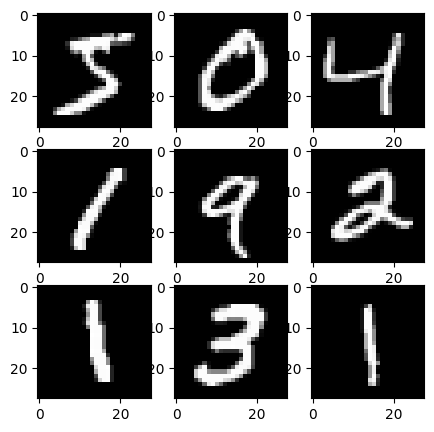

In [12]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
(trainX, trainy), (testX, testy) = load_data()

# summarize loaded dataset
print(f'Train: X={trainX.shape}, y={trainy.shape}')
print(f'Test: X={testX.shape}, y={testy.shape}')

plt.figure(figsize=(5,5))
for i in range(9):
	# define subplot
	plt.subplot(3, 3, i+1)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In the provided example, the MNIST dataset is loaded and the train and test datasets are summarized. The summary gives us an overview of the number of samples and labels in each dataset. To better understand the dataset, a plot is created to display a grid of examples of handwritten images from the training dataset. This helps visualize the data and get an idea of what the images look like.

Next, we proceed to train a CNN (Convolutional Neural Network) model to classify the images in the MNIST dataset. CNN models are commonly used for image classification tasks. However, before using the images as input to the model, we need to make some adjustments.

Since the images in the dataset are represented as arrays of grayscale pixel data, we need to add a channel dimension to the data. CNN models expect images to be in a channels-last format, where each example has dimensions of `[rows, columns, channels]`. The channel dimension represents the color channels of the image data.

Additionally, it's a good practice to scale the pixel values from the default range of `0-255` to a range of `0-1` before training a CNN model. This scaling helps the model converge faster and improves its performance.

By performing these steps, we can prepare the MNIST dataset for training a CNN model that can effectively classify the handwritten images.

In [13]:
from numpy import unique, argmax
from tensorflow.keras import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Load dataset
(x_train, y_train), (x_test, y_test) = load_data()

# Reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# Determine the shape of the input images and the number of classes
in_shape = x_train.shape[1:]
n_classes = len(unique(y_train))

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

# Evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {acc:.3f}')

# Make a prediction
image = x_train[0]
image = tf.expand_dims(image, 0)  # Add an extra dimension to match the model's input shape
y_hat = model.predict([image])
print(f'Predicted: class={argmax(y_hat)}')

Accuracy: 0.986
1/1 [==============================] - 0s 83ms/step
Predicted: class=5


In this case, we can see that the model achieved a classification accuracy of around 98% on the test dataset. We can then see that the model predicted class `5` for the first image in the training set.

## Develop Recurrent Neural Network (RNN) Models

Recurrent Neural Networks (RNNs) are designed to handle sequential data, making them well-suited for tasks like natural language processing, time series forecasting, and speech recognition. One popular type of RNN is the Long Short-Term Memory (LSTM) network.

LSTMs excel at capturing dependencies and patterns in sequences. They are commonly used to process input sequences and make predictions based on them. For example, an LSTM can take a sequence of text as input and predict the next word or assign a class label to the sequence.

In this demonstration, we'll use the car sales dataset to showcase how an LSTM RNN can be used for univariate time series forecasting. Our goal is to predict the number of car sales per month. We'll frame the problem by using a sliding window approach, where we take the last five months' data as input and predict the current month's data.

To prepare the data, we'll define a function called `split_sequence()`, which splits the input sequence into windows suitable for training a supervised learning model like an LSTM. We'll reserve the last 12 months of data as the test dataset.

LSTMs expect each sample in the dataset to have two dimensions: the number of time steps and the number of observations per time step. In our case, we'll set the number of time steps to 5 (representing the last five months) and the number of observations per time step to 1 (the number of car sales).

Since this is a regression problem, we'll use a linear activation function (no activation function) in the output layer. The model will be optimized using the mean squared error loss function, which measures the average squared difference between the predicted and actual values. We'll evaluate the model's performance using the mean absolute error (MAE) metric, which provides an average absolute difference between the predicted and actual values.

By applying an LSTM RNN to the car sales dataset and following these steps, we can train a model to forecast the number of car sales for the next month.

In [14]:
# LSTM for Time Series Forecasting
from pandas import read_csv
from numpy import sqrt, asarray
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps  # Find the end of this pattern
		if end_ix > len(sequence) - 1:  # Check if we are beyond the sequence
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]  # Gather input and output parts of the pattern
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

# Load the dataset
df = read_csv('./../../data/Monthly-Car-Sales.csv', header=0, index_col=0)

# Retrieve the values
values = df.values.astype('float32')

# Specify the window size
n_steps = 5

# Split into samples
X, y = split_sequence(values, n_steps)

# Reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'MSE: {mse:.3f}, RMSE: {sqrt(mse):.3f}, MAE: {mae:.3f}')

# Make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
y_hat = model.predict(row)
print(f'Predicted: {y_hat}')

MSE: 14108973.000, RMSE: 3756.191, MAE: 3133.163
1/1 [==============================] - 0s 277ms/step
Predicted: [[15298.534]]


In this case, the model achieved an MAE of around 2800 and predicted the next value in the sequence from the test set as 14884, where the expected value is 14,577 (pretty close).

## Visualize a Deep Learning Model

Deep learning models can become large and intricate, making it crucial to have a clear understanding of the connections and data flow within the model. This is particularly important when using the functional API, as it ensures that the layers of the model are connected as intended.

To gain clarity about the model's architecture, you can utilize two visualization tools:
- A Text Description
- A Plot

By utilizing both the text description and the plot, you can effectively visualize and grasp the architecture of your deep learning model. This understanding is vital for ensuring that the model behaves as intended and enables you to identify and address any discrepancies or intricacies in its design.

### 1. Model Text Description

The text description provides a detailed representation of the model's structure. It outlines the layers, their configurations, and how they are connected. By examining this description, you can get a comprehensive understanding of the model's design and ensure that it aligns with your intentions. A text description of your model can be displayed by calling the `summary()` function on your model.

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Summarize the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                90        
                                                                 
 dense_21 (Dense)            (None, 8)                 88        
                                                                 
 dense_22 (Dense)            (None, 1)                 9         
                                                                 
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


The code above prints the summary of each layer of a model. This is an invaluable diagnostic for checking the output shapes and number of parameters (weights) in the model.

### 2. Model Architecture Plot

In addition to the textual representation, you can generate a plot that visualizes the model's architecture. This graphical depiction illustrates the flow of data through the layers, showcasing how the inputs are transformed and propagated through the network. The plot gives a visual overview of the model, making it easier to comprehend the connections and identify any potential issues or complexities. You can create a plot of your model by calling the `plot_model()` function.

You must install `pydot` and [graphviz](https://graphviz.gitlab.io/download/) for `plot_model` to work.

```python
pip install pydot
```

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Visualize the model
plot_model(model, 'model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3. Model Learning Curves

Learning curves are plots that show how a neural network model's performance changes over time, typically at the end of each training epoch. They provide valuable insights into the learning process, indicating whether the model is learning well, underfitting the training data, or overfitting it.

To create learning curves for your deep learning models, you need to update the `fit()` function call to include a reference to a validation dataset. This dataset is separate from the training set and is used to evaluate the model's performance during training.

There are two ways to incorporate the validation dataset: manually splitting the data and specifying it in the `validation_data` argument, or using the simpler approach of using the `validation_split` argument, which automatically splits a percentage of the training dataset for validation.

When you call `fit()`, it returns a history object that contains performance metrics recorded at the end of each training epoch. This includes the chosen loss function and any configured metrics, such as accuracy. These metrics are computed for both the training and validation datasets.

To create a learning curve, you plot the loss values on the training dataset and the validation dataset. This can be achieved using the `Matplotlib` library. By graphing the loss values over the epochs, you can visualize the model's progress.

Here's an example: Let's say you're training a small neural network on a synthetic binary classification problem. You use a 30% validation split to evaluate the model during training. You can then plot the cross-entropy loss on the training and validation datasets using a line plot.

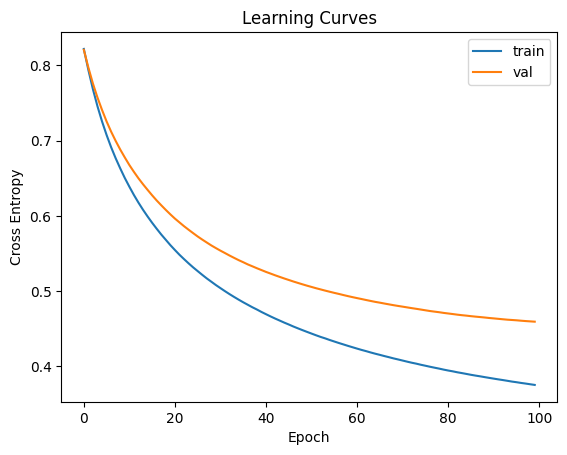

In [17]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# Create a dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Determine the number of input features
n_features = X.shape[1]

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# Fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# Plot Learning Curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Saving and Loading Model


In machine learning, there are scenarios where we want to use a trained model without retraining it from scratch every time. To accomplish this, we can save the model to a file and later load it to make predictions.

In TensorFlow, you can save a model using the `save()` function, and it will be stored in the `H5` format, which is an efficient array storage format. To save the model, make sure you have the `h5py` library installed on your workstation.

```python
pip install h5py
```

In [18]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Determine the number of input features
n_features = X.shape[1]

# Define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# Save model to file
model.save('model.h5')

In this example, we first fit the model to the training data and save it as `model.h5` using the `save()` method of the model object.

Now, we can load the saved model using `keras.models.load_model()`. This allows us to use the loaded model for making predictions. We will call the `predict()` method on the loaded model, which generates the predictions. We can then process or display these predictions as needed.

In [19]:
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model

# Create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Load the model from file
model = load_model('model.h5')

# Make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print(f'Predicted: {yhat}')

1/1 [==============================] - 0s 96ms/step
Predicted: [[0.86964005]]


## Improve Model Performance

In this section, you will discover some of the techniques that you can use to improve the performance of your deep learning models.

A big part of improving deep learning performance involves avoiding overfitting by slowing down the learning process or stopping the learning process at the right time.

### 1. Reduce Overfitting With Dropout

Dropout is a regularization technique used in deep learning to reduce overfitting and enhance the model's robustness. During training, Dropout randomly ignores or "drops out" a certain number of layer outputs. This dropout effect makes the layer appear as if it has a different number of nodes and connectivity to the previous layer.

The purpose of Dropout is to introduce noise into the training process, which makes individual nodes within a layer probabilistically take on more or less responsibility for the inputs. This helps prevent the model from relying too heavily on specific nodes and encourages the network to learn more generalizable representations.

To add Dropout to your models, you insert a Dropout layer before the layer where you want to apply dropout. The Dropout layer is created using the `Dropout()` function, which takes an argument specifying the probability of dropping each output. For example, a value of `0.4` means that 40% of the inputs will be dropped during each update of the model.

You can incorporate Dropout layers in various types of models, including Multi-Layer Perceptrons (MLPs), Convolutional Neural Networks (CNNs), and Recurrent Neural Networks (RNNs). It's worth noting that specialized versions of Dropout exist for CNNs and RNNs, which you can explore if working with those types of models.

In [20]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot

# Create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Determine the number of input features
n_features = X.shape[1]

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

The example above demonstrates the use of Dropout in a small neural network model for a binary classification problem. A Dropout layer with a dropout rate of 50% is inserted between the first hidden layer and the output layer:

### 2 Accelerate Training with Batch Normalization

The scale and distribution of input data can have a significant impact on the training process and performance of a neural network. To ensure smooth and efficient training, it is often recommended to scale the input data before feeding it into the neural network.

Batch normalization is a technique specifically designed to train deep neural networks effectively. It works by standardizing the inputs to a layer for each mini-batch during training. This process helps stabilize the learning process and significantly reduces the number of training epochs required to train deep networks.

To apply batch normalization in your network, you can add a batch normalization layer before the layer for which you want to standardize the inputs. This can be easily achieved by adding a `BatchNormalization` layer directly in your model.

For example, let's consider a small MLP (Multi-Layer Perceptron) network used for binary classification. To incorporate batch normalization, you can insert a batch normalization layer between the first hidden layer and the output layer. This allows the inputs to the output layer to be standardized based on the mini-batch.

In [21]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# Create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Determine the number of input features
n_features = X.shape[1]

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

### 3. Halt Training at the Right Time with Early Stopping

Training neural networks can be challenging because finding the right balance between underfitting and overfitting is crucial. Underfitting occurs when the model fails to capture the underlying patterns in the data, resulting in poor performance. On the other hand, overfitting happens when the model becomes too specialized to the training data, performing poorly on new, unseen data.

To address this issue, we can employ a technique called early stopping. Early stopping involves monitoring the loss on both the training dataset and a separate validation dataset, which is a portion of the training set not used for training. When the loss on the validation dataset starts to indicate overfitting, we can stop the training process.

To use early stopping with your model, you need to have a validation dataset. This can be created manually by specifying the `validation_data` argument in the `fit()` function or by using the `validation_split` argument to hold back a portion of the training data for validation.

Next, you define an `EarlyStopping` callback, specifying the performance measure to monitor, such as `val_loss` for the loss on the validation dataset. You can also set the number of epochs to observe overfitting before taking action, such as stopping training after `5` epochs of overfitting. Once the `EarlyStopping` callback is configured, you can provide it to the `fit()` function using the callbacks argument, which takes a list of callbacks.

By setting a large number of epochs, you can be confident that training will stop as soon as overfitting occurs. Additionally, you can create a learning curve to gain insights into the training dynamics and determine when the training was halted.

Here's an example that demonstrates the use of early stopping on a small neural network for a binary classification problem. In this example, training is stopped as soon as overfitting is detected, which occurs after around 50 epochs.

In [22]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Determine the number of input features
n_features = X.shape[1]

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model
history = model.fit(X, y, epochs=200, batch_size=32, validation_split=0.3, callbacks=[es])

Epoch 1/200
22/22 [==============================] - 1s 12ms/step - loss: 0.8296 - val_loss: 0.8141
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.7644 - val_loss: 0.7567
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 0.7127 - val_loss: 0.7118
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6709 - val_loss: 0.6760
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6362 - val_loss: 0.6459
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6059 - val_loss: 0.6186
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5786 - val_loss: 0.5948
Epoch 8/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5530 - val_loss: 0.5739
Epoch 9/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5309 - val_loss: 0.5542
Epoch 10/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5093 - val_loss: 0.5362
Epoch 11

Text(0.5, 1.0, 'Loss evolution')

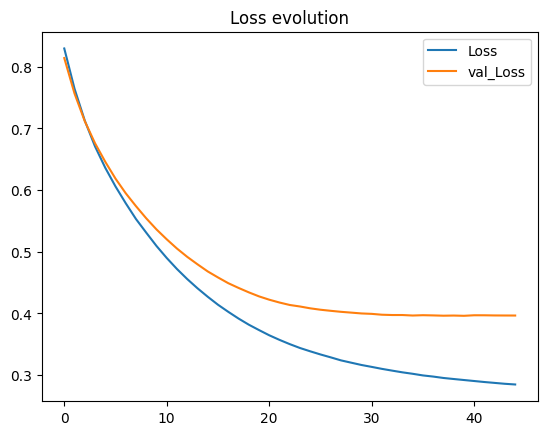

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

## References

- [Tensorflow Official Tutorial](https://www.tensorflow.org/tutorials)
- [TensorFlow 2 Tutorial: Get Started in Deep Learning with tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)
- [Tensorflow Course](https://github.com/instillai/TensorFlow-Course#neural-networks)